Analysis of PRS probe data GMDR Thunder Basin 

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#for r in python option 1
'''from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")'''

'from functools import partial\nfrom rpy2.ipython import html\nhtml.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")'

In [2]:
# for r in python option 2
load_ext rpy2.ipython

SyntaxError: invalid syntax (Temp/ipykernel_20784/3426577306.py, line 2)

In [3]:
#import data
prs= pd.read_csv('PRS_ProbeData2022.csv', skiprows= 6)
trt= pd.read_csv('BlockPadPlot.csv')

In [4]:
#Change column names by removing '-' form NO3-N and NH4-N to make plotting work
prs = prs.rename(columns={'NO3-N': 'NO3', 'NH4-N': 'NH4'})
prs.head()

,Site,PlotID,Install,Removal,WAL #,Sample ID,Burial Date,Retrieval Date,# Anion,# Cation,...,P,Fe,Mn,Cu,Zn,B,S,Pb,Al,Cd
0,TB,1,5/1/2020,6/30/2020,192668,P1,5/1/2020,6/30/2020,3,3,...,1.9,2.3,0.3,0.5,2.5,0.2,6.5,0.0,5.7,0.0
1,TB,2,5/1/2020,6/30/2020,192669,P2,5/1/2020,6/30/2020,3,3,...,0.9,2.3,0.6,0.7,1.3,0.9,4.2,0.0,10.3,0.0
2,TB,3,5/1/2020,6/30/2020,192670,P3,5/1/2020,6/30/2020,3,3,...,5.4,2.6,0.7,1.2,1.0,0.2,9.1,0.0,6.0,0.0
3,TB,4,5/1/2020,6/30/2020,192671,P4,5/1/2020,6/30/2020,3,2,...,3.0,1.7,0.5,0.8,0.9,0.6,6.2,0.0,6.5,0.0
4,TB,5,5/1/2020,6/30/2020,192672,P5,5/1/2020,6/30/2020,3,3,...,4.1,2.3,0.7,0.4,1.1,0.4,10.3,0.0,10.5,0.0


In [5]:
cols=['PlotID', 'Install', 'Removal', 'NO3', 'NH4', 'Ca', 'Mg', 'K', 'P', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'S','Pb', 'Al', 'Cd']
nuts=['NO3', 'NH4', 'Ca', 'Mg', 'K', 'P', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'S','Pb', 'Al', 'Cd']
nut1=['NO3-N', 'NH4-N', 'Ca', 'Mg', 'K']
nut2=['P', 'Fe', 'Mn', 'Cu', 'Zn']
nut3=['B', 'S','Pb', 'Al', 'Cd']
prs=prs[cols]
prs.head()


,PlotID,Install,Removal,NO3,NH4,Ca,Mg,K,P,Fe,Mn,Cu,Zn,B,S,Pb,Al,Cd
0,1,5/1/2020,6/30/2020,16.0,12.3,715,265,118,1.9,2.3,0.3,0.5,2.5,0.2,6.5,0.0,5.7,0.0
1,2,5/1/2020,6/30/2020,6.4,7.1,481,154,126,0.9,2.3,0.6,0.7,1.3,0.9,4.2,0.0,10.3,0.0
2,3,5/1/2020,6/30/2020,21.4,12.0,639,213,191,5.4,2.6,0.7,1.2,1.0,0.2,9.1,0.0,6.0,0.0
3,4,5/1/2020,6/30/2020,21.1,15.5,827,351,171,3.0,1.7,0.5,0.8,0.9,0.6,6.2,0.0,6.5,0.0
4,5,5/1/2020,6/30/2020,18.5,16.7,909,329,475,4.1,2.3,0.7,0.4,1.1,0.4,10.3,0.0,10.5,0.0


In [6]:
trt.head()

,Site,Block,Paddock,Plot,PlotID,Drought,Grazing
0,TB,1,2,1,1,75,HHMMM
1,TB,1,2,2,2,99,HHMMM
2,TB,1,2,3,3,1,HHMMM
3,TB,1,2,4,4,2,HHMMM
4,TB,1,2,5,5,50,HHMMM


In [7]:
# Merge with treatment file to get drought and grazing treatments
prs= pd.merge(prs, trt)

In [8]:
prs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PlotID   162 non-null    int64  
 1   Install  162 non-null    object 
 2   Removal  162 non-null    object 
 3   NO3      162 non-null    float64
 4   NH4      162 non-null    float64
 5   Ca       162 non-null    int64  
 6   Mg       162 non-null    int64  
 7   K        162 non-null    int64  
 8   P        162 non-null    float64
 9   Fe       162 non-null    float64
 10  Mn       162 non-null    float64
 11  Cu       162 non-null    float64
 12  Zn       162 non-null    float64
 13  B        162 non-null    float64
 14  S        162 non-null    float64
 15  Pb       162 non-null    float64
 16  Al       162 non-null    float64
 17  Cd       162 non-null    float64
 18  Site     162 non-null    object 
 19  Block    162 non-null    int64  
 20  Paddock  162 non-null    int64  
 21  Plot     162 non

In [9]:
#make install and remove of type date64
prs['Install']= prs['Install'].astype('datetime64')
prs['Removal']= prs['Removal'].astype('datetime64')


In [10]:
# Create year column
prs['Year']= prs['Install'].dt.year

In [11]:
prs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PlotID   162 non-null    int64         
 1   Install  162 non-null    datetime64[ns]
 2   Removal  162 non-null    datetime64[ns]
 3   NO3      162 non-null    float64       
 4   NH4      162 non-null    float64       
 5   Ca       162 non-null    int64         
 6   Mg       162 non-null    int64         
 7   K        162 non-null    int64         
 8   P        162 non-null    float64       
 9   Fe       162 non-null    float64       
 10  Mn       162 non-null    float64       
 11  Cu       162 non-null    float64       
 12  Zn       162 non-null    float64       
 13  B        162 non-null    float64       
 14  S        162 non-null    float64       
 15  Pb       162 non-null    float64       
 16  Al       162 non-null    float64       
 17  Cd       162 non-null    float64   

In [12]:
#Create a dictionay to convert exclusion treatments to precipition percent
precip= {1: 100, 2: 100, 25: 75, 50: 50, 75: 25, 99: 1}

In [13]:
#use apply with a lambda funtion to apply the precip dictionary producing a new precip percentage column
prs['Precip']= prs.apply(lambda row: precip[row.Drought], axis=1)

In [14]:
prs.head()

,PlotID,Install,Removal,NO3,NH4,Ca,Mg,K,P,Fe,...,Al,Cd,Site,Block,Paddock,Plot,Drought,Grazing,Year,Precip
0,1,2020-05-01,2020-06-30,16.0,12.3,715,265,118,1.9,2.3,...,5.7,0.0,TB,1,2,1,75,HHMMM,2020,25
1,1,2021-04-22,2021-07-26,58.0,6.0,1350,609,159,1.4,2.3,...,7.2,0.0,TB,1,2,1,75,HHMMM,2021,25
2,1,2022-04-21,2022-07-28,11.0,20.0,1695,611,138,1.1,4.1,...,12.2,0.0,TB,1,2,1,75,HHMMM,2022,25
3,2,2020-05-01,2020-06-30,6.4,7.1,481,154,126,0.9,2.3,...,10.3,0.0,TB,1,2,2,99,HHMMM,2020,1
4,2,2021-04-22,2021-07-26,29.0,3.0,991,374,185,1.4,1.3,...,5.0,0.0,TB,1,2,2,99,HHMMM,2021,1


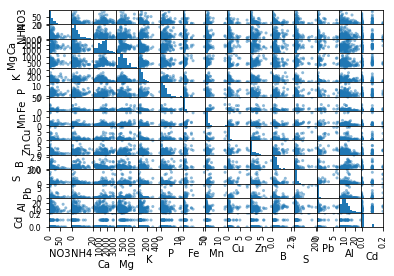

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
  
# plotting the scatter matrix for total list of nutrients
scatter_matrix(prs[nuts])
plt.show()

In [16]:
prs.head()

,PlotID,Install,Removal,NO3,NH4,Ca,Mg,K,P,Fe,...,Al,Cd,Site,Block,Paddock,Plot,Drought,Grazing,Year,Precip
0,1,2020-05-01,2020-06-30,16.0,12.3,715,265,118,1.9,2.3,...,5.7,0.0,TB,1,2,1,75,HHMMM,2020,25
1,1,2021-04-22,2021-07-26,58.0,6.0,1350,609,159,1.4,2.3,...,7.2,0.0,TB,1,2,1,75,HHMMM,2021,25
2,1,2022-04-21,2022-07-28,11.0,20.0,1695,611,138,1.1,4.1,...,12.2,0.0,TB,1,2,1,75,HHMMM,2022,25
3,2,2020-05-01,2020-06-30,6.4,7.1,481,154,126,0.9,2.3,...,10.3,0.0,TB,1,2,2,99,HHMMM,2020,1
4,2,2021-04-22,2021-07-26,29.0,3.0,991,374,185,1.4,1.3,...,5.0,0.0,TB,1,2,2,99,HHMMM,2021,1


In [17]:
#plt.savefig('Path/morepath/filenam.png', dpi=300)

In [18]:
var_dict = {}
prefix='value_'
for v in nuts:
    var_dict[v] = prefix + v
var_dict

{'NO3': 'value_NO3',
 'NH4': 'value_NH4',
 'Ca': 'value_Ca',
 'Mg': 'value_Mg',
 'K': 'value_K',
 'P': 'value_P',
 'Fe': 'value_Fe',
 'Mn': 'value_Mn',
 'Cu': 'value_Cu',
 'Zn': 'value_Zn',
 'B': 'value_B',
 'S': 'value_S',
 'Pb': 'value_Pb',
 'Al': 'value_Al',
 'Cd': 'value_Cd'}

In [26]:
prs2 = prs.rename(columns=var_dict)
prs2
prs2.to_csv("prs_wide.csv", index=False, header=False)

In [20]:
#code skipped purpose unclear
#prs2['id'] = prs2.index
#prs2

In [21]:
prslong= pd.wide_to_long(prs2, stubnames='value', i=['PlotID', 'Year', 'Precip', 'Grazing', 'Block', 'Paddock'], 
                      j='Nutrient', 
                      sep='_',
                      suffix=r'\w+').reset_index()
prslong

,PlotID,Year,Precip,Grazing,Block,Paddock,Nutrient,Removal,Site,Install,Drought,Plot,value
0,1,2020,25,HHMMM,1,2,NO3,2020-06-30,TB,2020-05-01,75,1,16.0
1,1,2020,25,HHMMM,1,2,NH4,2020-06-30,TB,2020-05-01,75,1,12.3
2,1,2020,25,HHMMM,1,2,Ca,2020-06-30,TB,2020-05-01,75,1,715.0
3,1,2020,25,HHMMM,1,2,Mg,2020-06-30,TB,2020-05-01,75,1,265.0
4,1,2020,25,HHMMM,1,2,K,2020-06-30,TB,2020-05-01,75,1,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,54,2022,25,MMMMM,3,1,B,2022-07-29,TB,2022-04-21,75,6,0.4
2426,54,2022,25,MMMMM,3,1,S,2022-07-29,TB,2022-04-21,75,6,199.0
2427,54,2022,25,MMMMM,3,1,Pb,2022-07-29,TB,2022-04-21,75,6,6.0
2428,54,2022,25,MMMMM,3,1,Al,2022-07-29,TB,2022-04-21,75,6,12.8


In [22]:
prslong.to_csv("prs.csv", index=False, header=False)

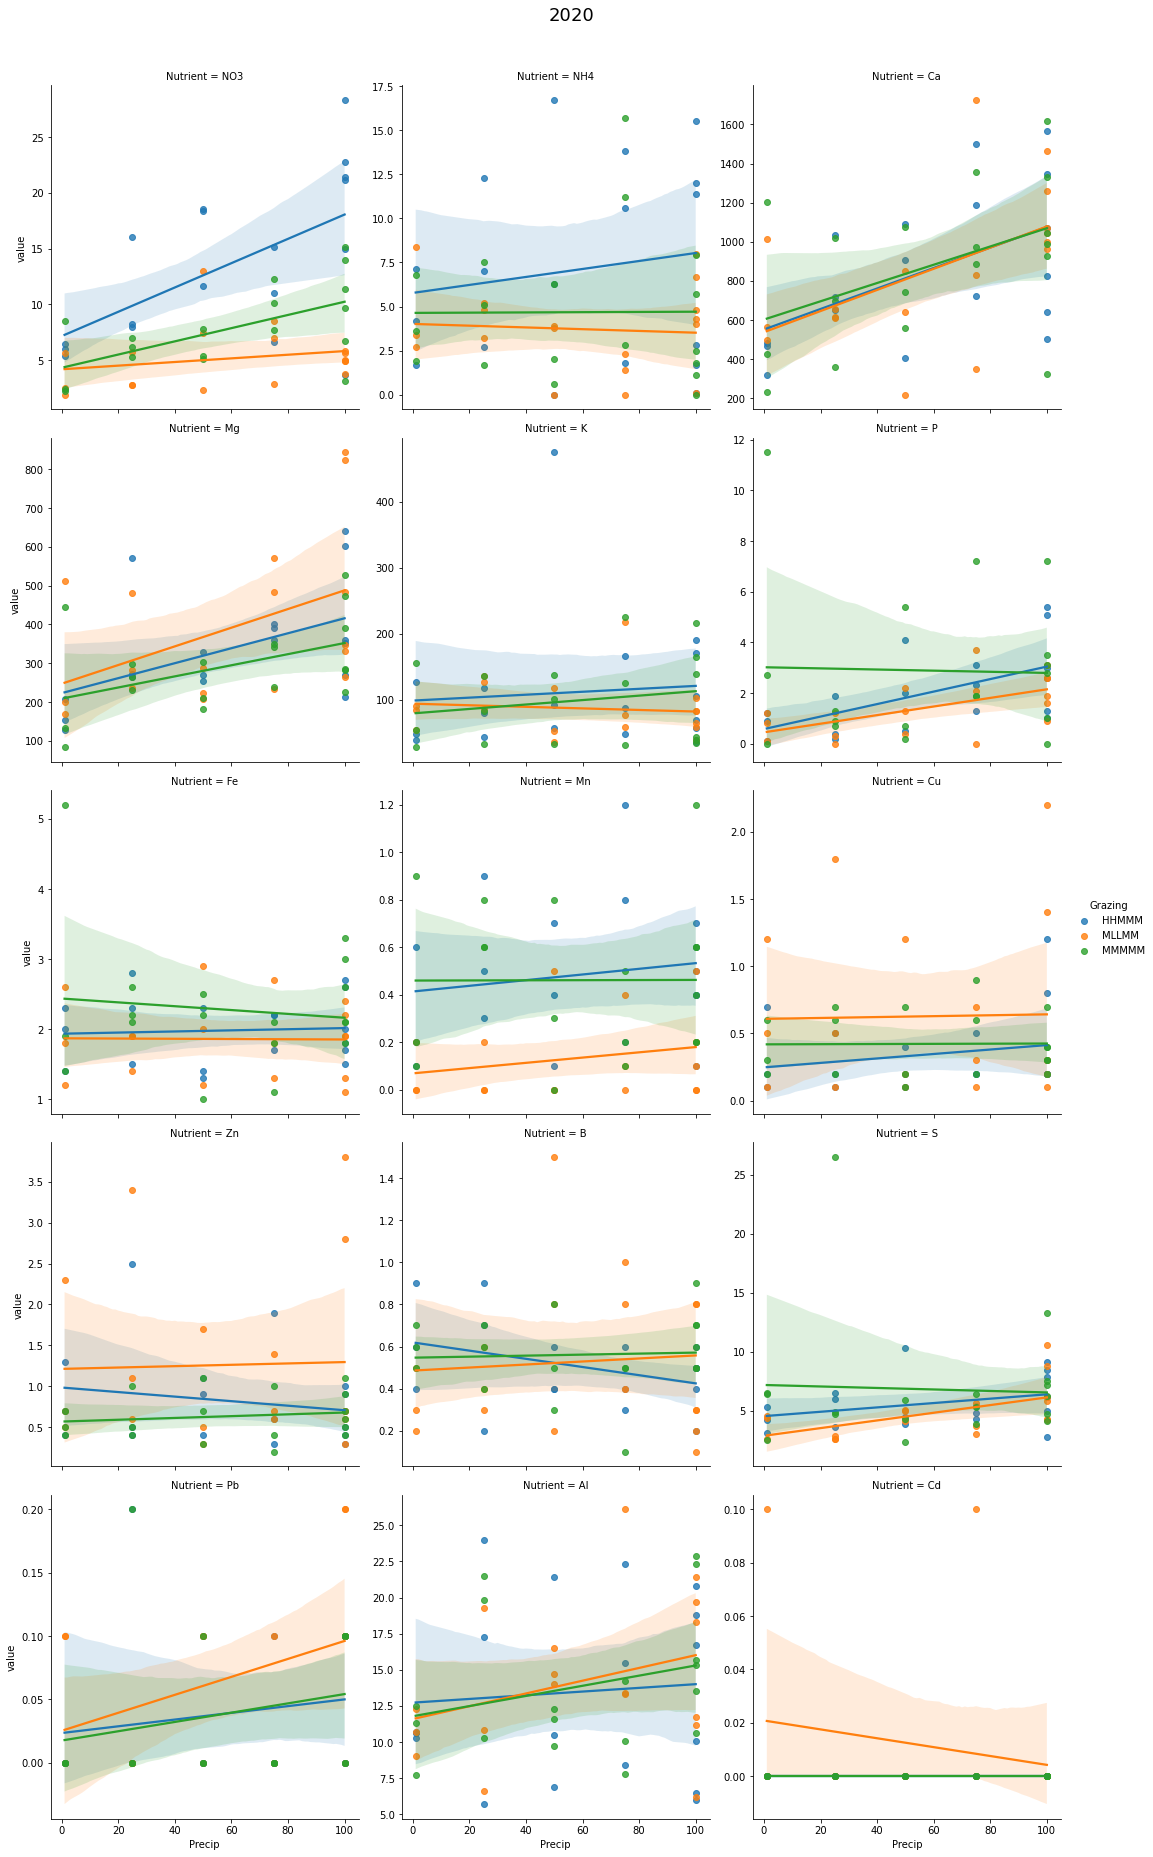

In [23]:
sns.lmplot(x= 'Precip', y= 'value', hue= 'Grazing', col= 'Nutrient', col_wrap=3, data= prslong[prslong['Year']== 2020], 
           facet_kws=dict(sharey=False)).fig.suptitle('2020', y = 1.03, fontsize = 18)
plt.savefig(r'C:\Users\John\OneDrive\Desktop\GxDR_Data\PRS_analysis\GrzVsPrecip2020.png', dpi=300, bbox_inches='tight')
plt.show()


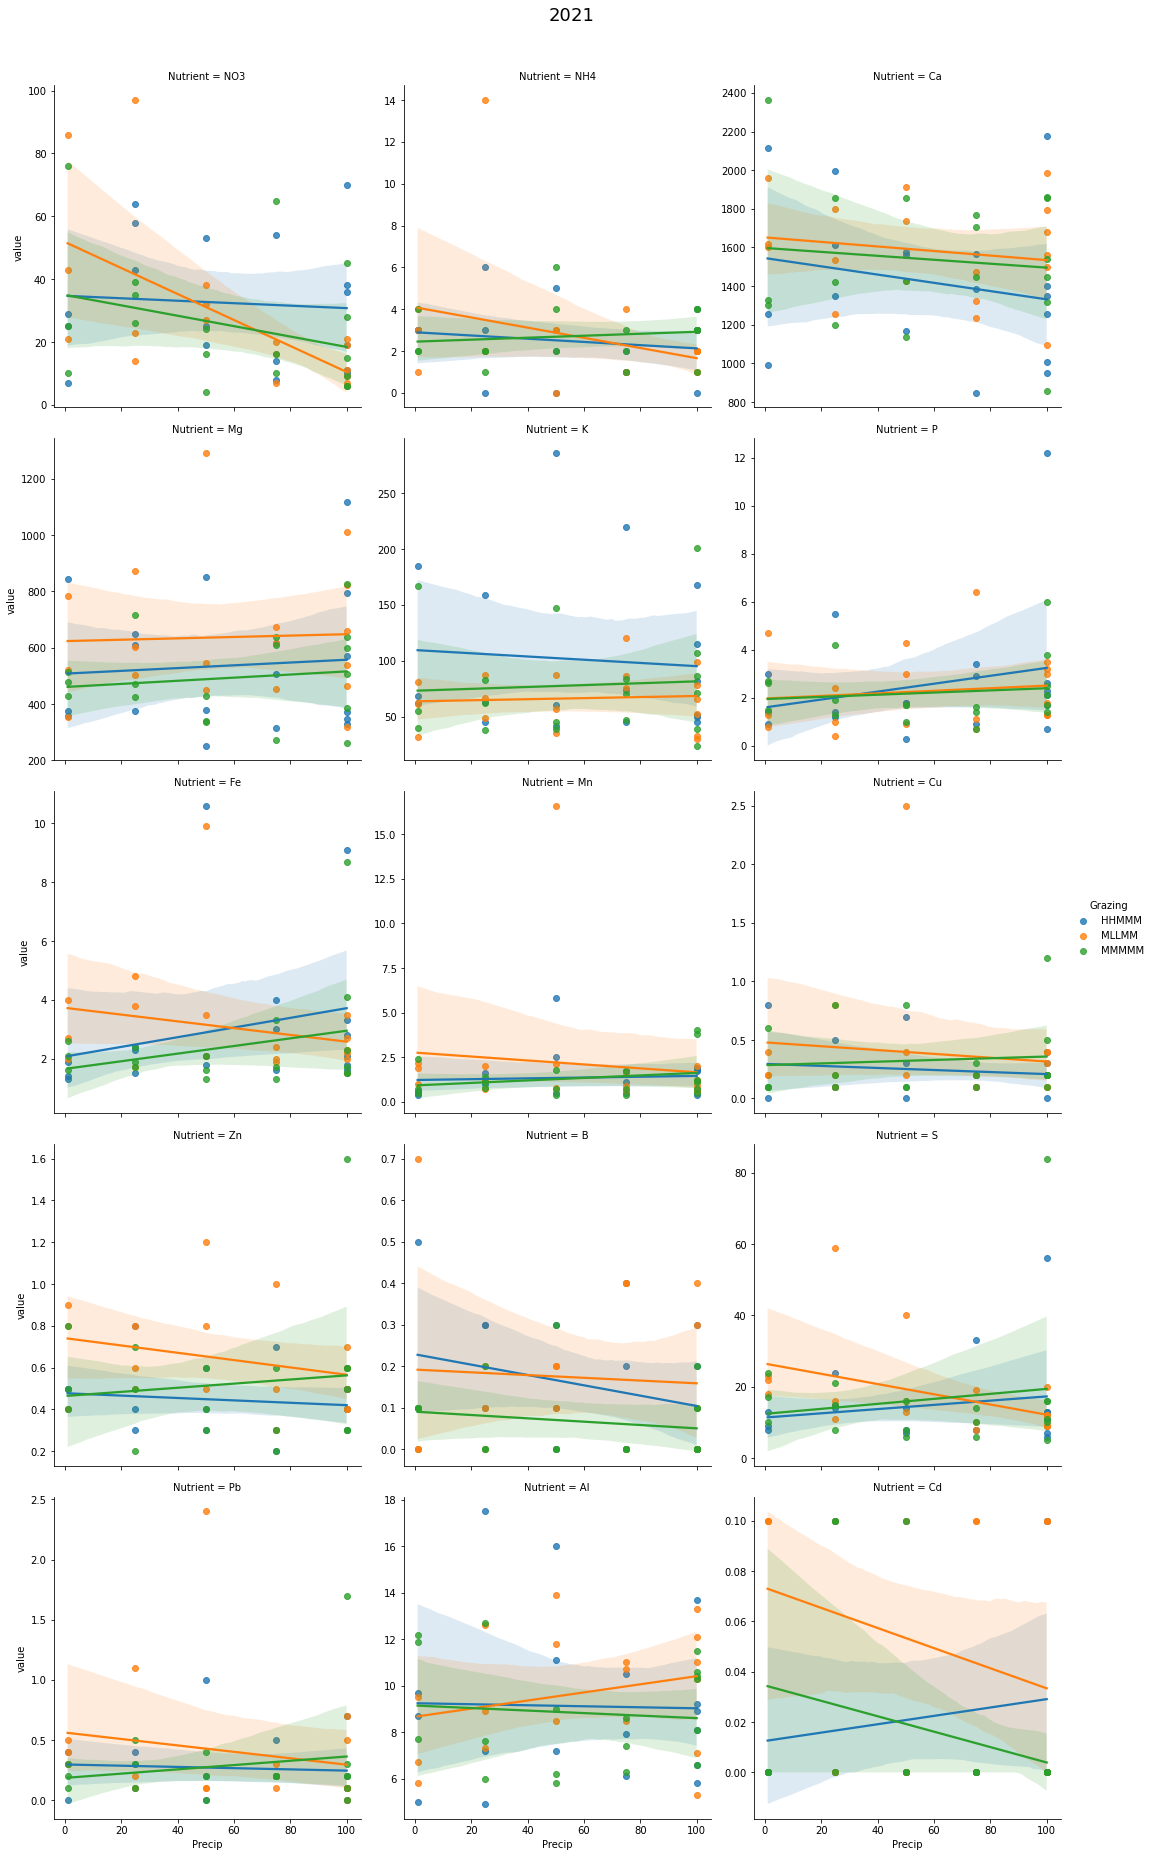

In [24]:
sns.lmplot(x= 'Precip', y= 'value', hue= 'Grazing', col= 'Nutrient', col_wrap=3, data= prslong[prslong['Year']== 2021], 
           facet_kws=dict(sharey=False)).fig.suptitle('2021', y = 1.03, fontsize = 18)
plt.savefig(r'C:\Users\John\OneDrive\Desktop\GxDR_Data\PRS_analysis\GrzVsPrecip21Long.png', dpi=300, bbox_inches='tight')
plt.show()


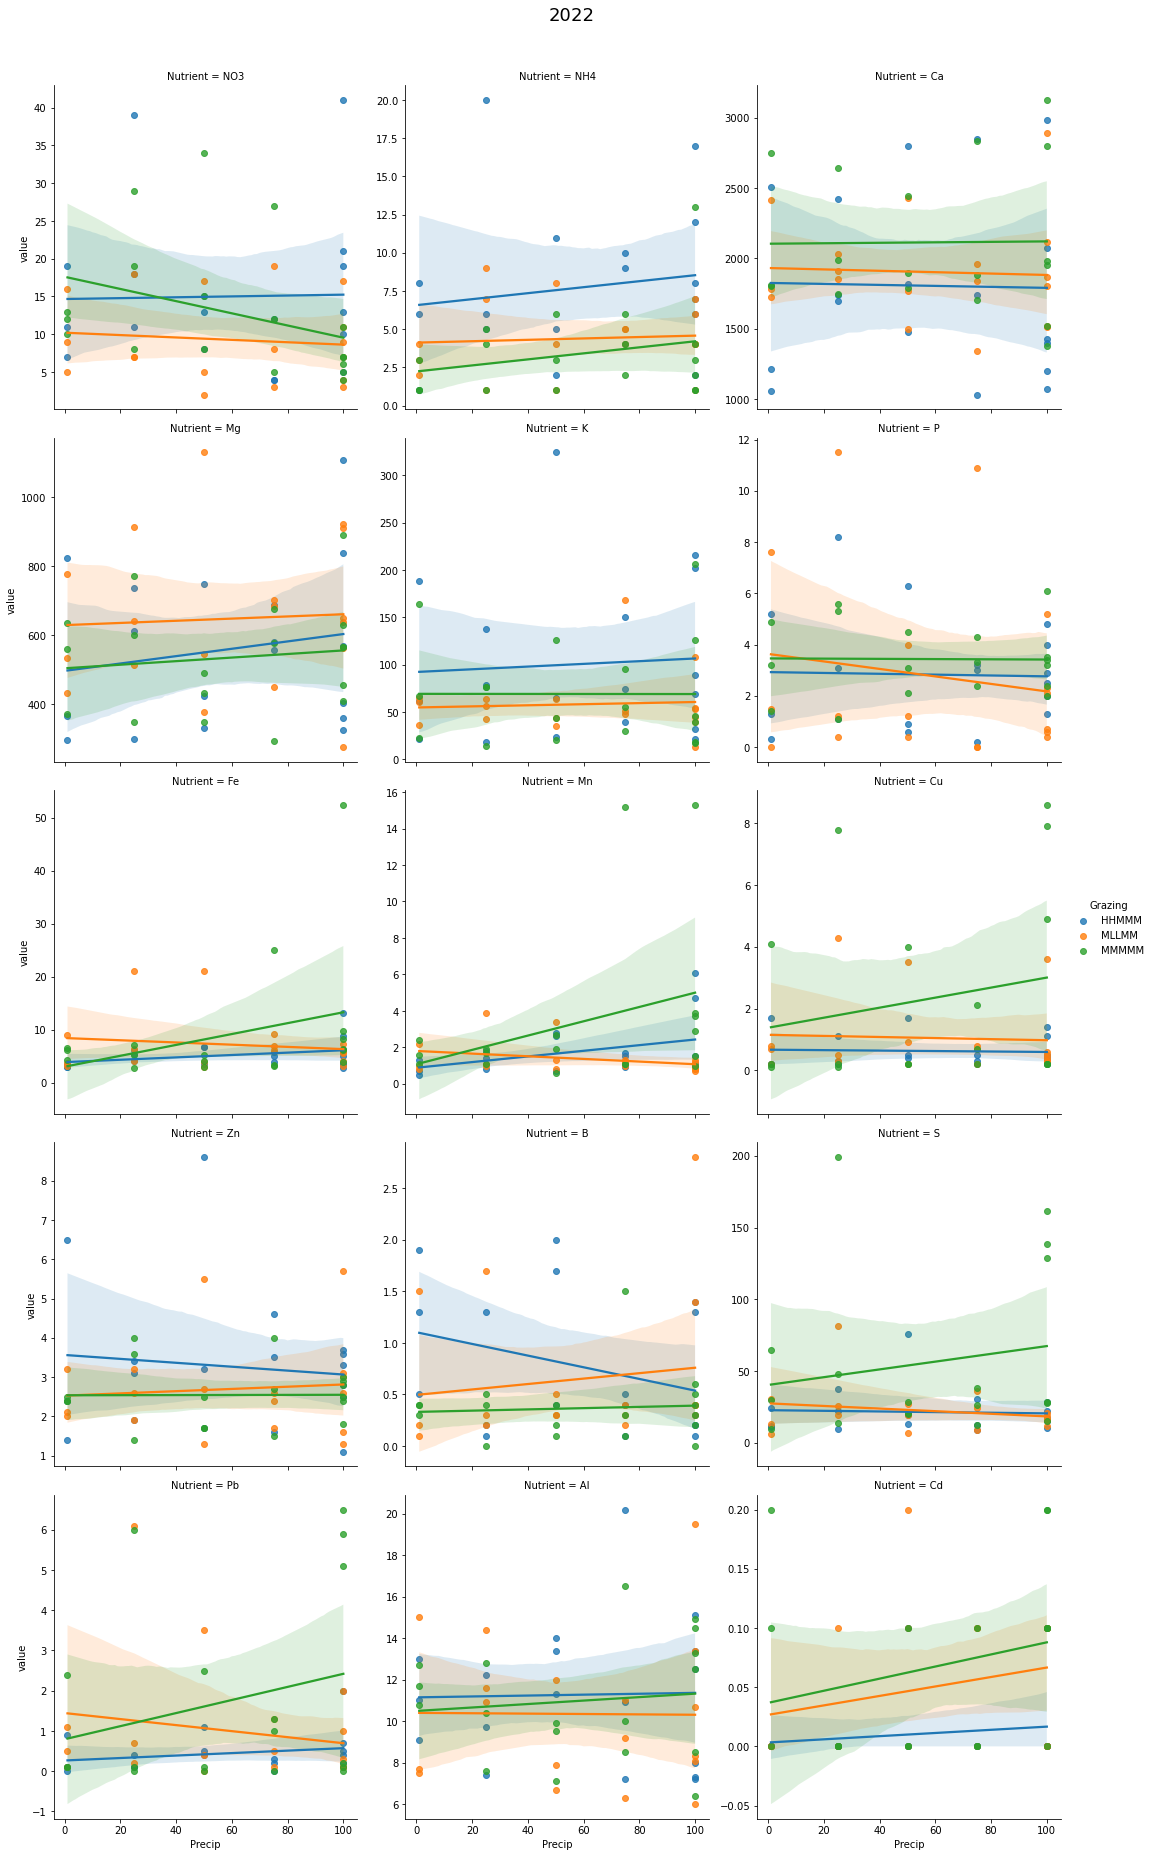

In [25]:
sns.lmplot(x= 'Precip', y= 'value', hue= 'Grazing', col= 'Nutrient', col_wrap=3, data= prslong[prslong['Year']== 2022], 
           facet_kws=dict(sharey=False)).fig.suptitle('2022', y = 1.03, fontsize = 18)
plt.savefig(r'C:\Users\John\OneDrive\Desktop\GxDR_Data\PRS_analysis\GrzVsPrecip22Long.png', dpi=300, bbox_inches='tight')
plt.show()

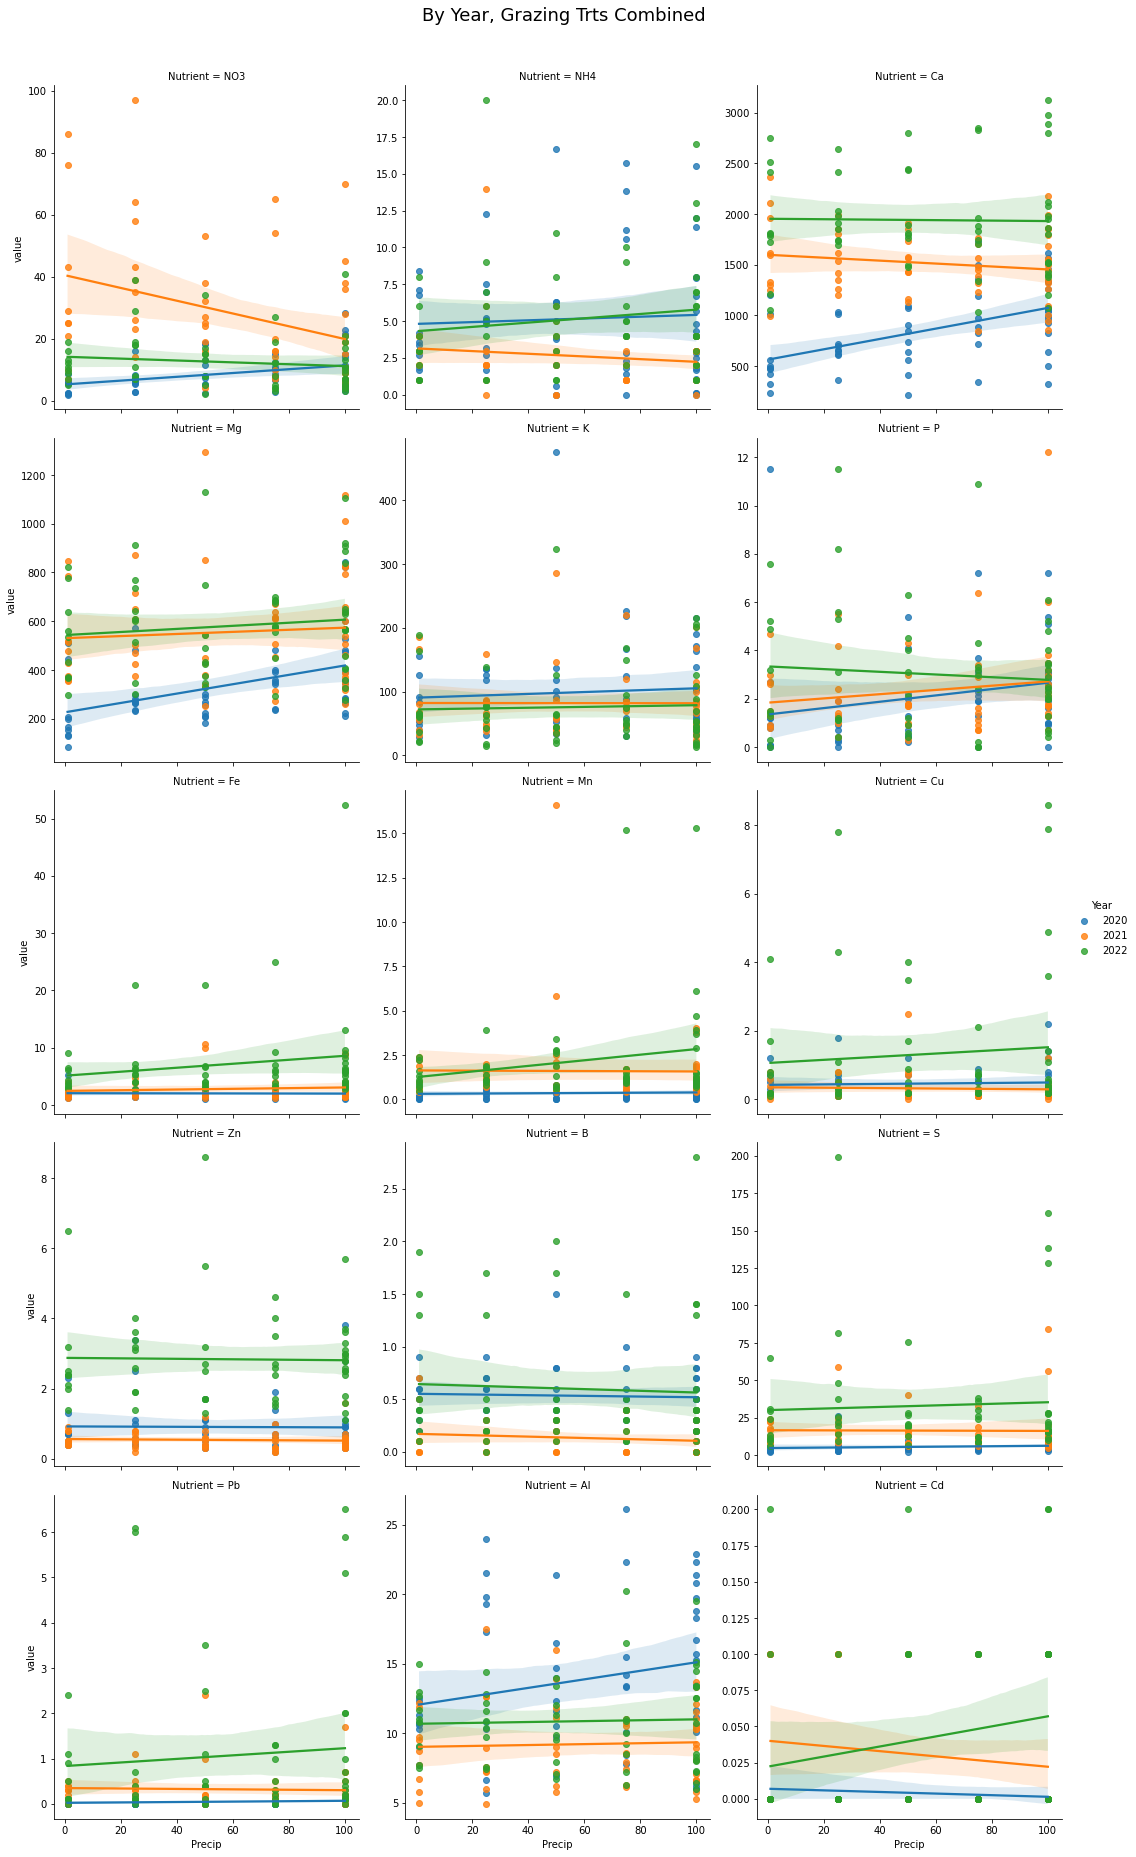

In [25]:
sns.lmplot(x= 'Precip', y= 'value', hue= 'Year', col= 'Nutrient', col_wrap=3, data= prslong, 
           facet_kws=dict(sharey=False)).fig.suptitle('By Year, Grazing Trts Combined', y = 1.03, fontsize = 18)
plt.savefig(r'C:\Users\John\OneDrive\Desktop\GxDR_Data\PRS_analysis\YearVsPrecipLong.png', dpi=300, bbox_inches='tight')
plt.show()

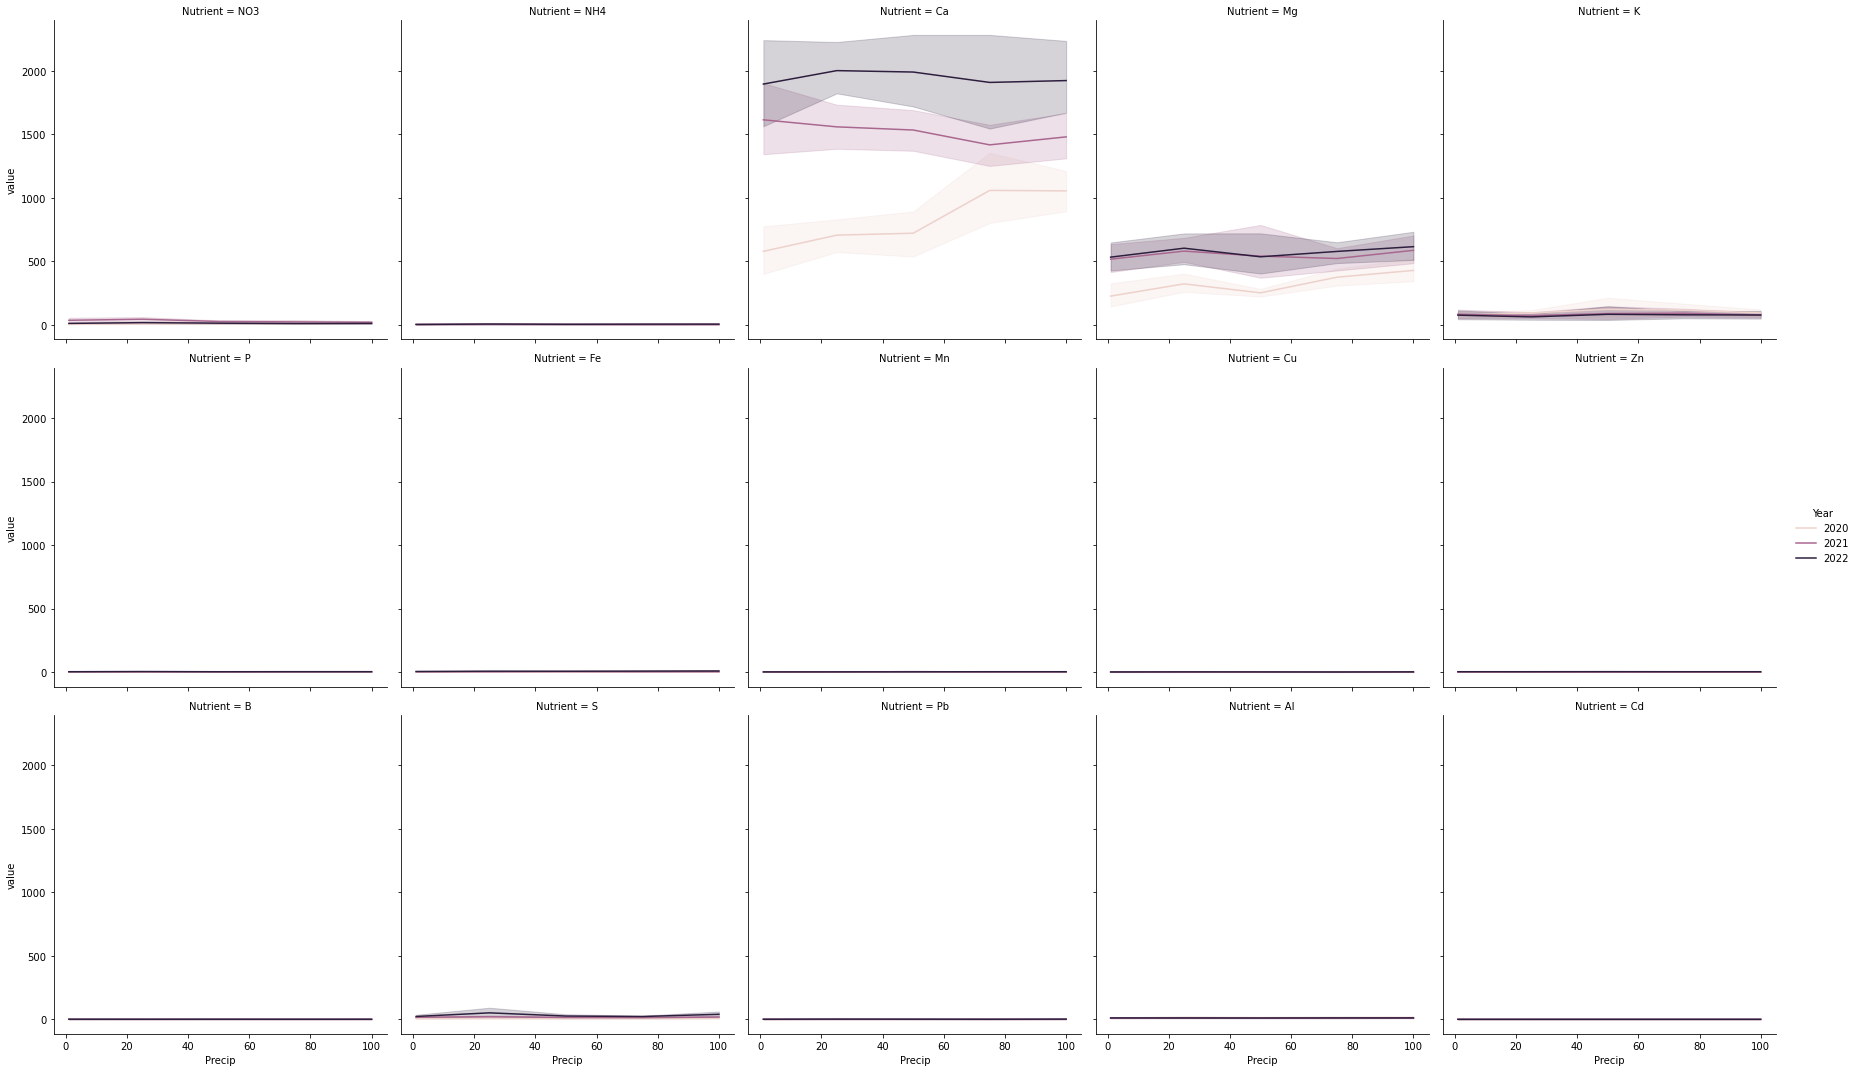

In [38]:
sns.relplot(data=prslong, x="Precip", y="value", hue="Year", col="Nutrient", col_wrap=5, kind='line')

In [27]:
#FacetGrid approach
#g = sns.FacetGrid(data=prslong, hue='Grazing', col='Nutrient', col_wrap=4)
#g.map(sns.lmplot, x='Precip', y='value')

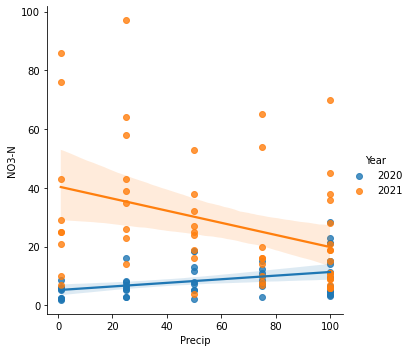

In [16]:
sns.lmplot(x= 'Precip', y= 'NO3-N', hue= 'Year', data= prs)

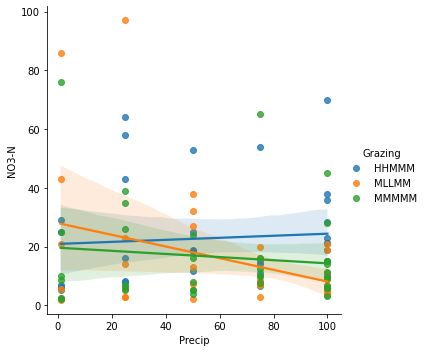

In [16]:
sns.lmplot(x= 'Precip', y= 'NO3-N', hue= 'Grazing', data= prs)

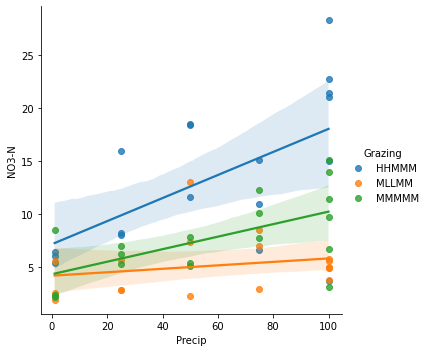

In [17]:
sns.lmplot(x= 'Precip', y= 'NO3-N', hue= 'Grazing', data= prs[prs['Year']== 2020]) #prs probes where out before grazing

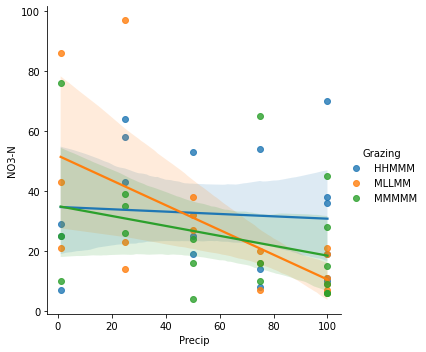

In [18]:
sns.lmplot(x= 'Precip', y= 'NO3-N', hue= 'Grazing', data= prs[prs['Year']== 2021]) #prs probes where out after grazing

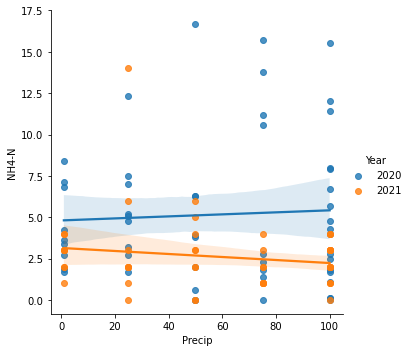

In [19]:
sns.lmplot(x= 'Precip', y= 'NH4-N', hue= 'Year', data= prs)

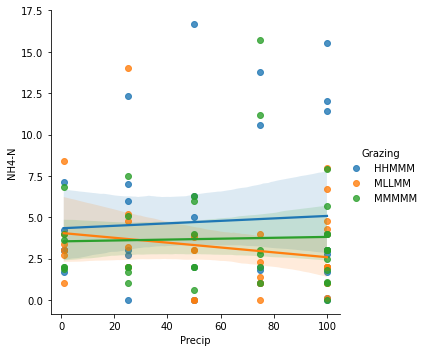

In [20]:
sns.lmplot(x= 'Precip', y= 'NH4-N', hue= 'Grazing', data= prs)

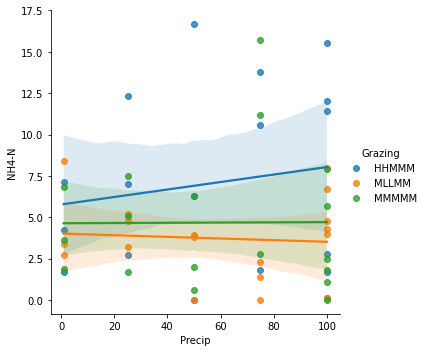

In [21]:
sns.lmplot(x= 'Precip', y= 'NH4-N', hue= 'Grazing', data= prs[prs['Year']== 2020]) #prs probes where out before grazing

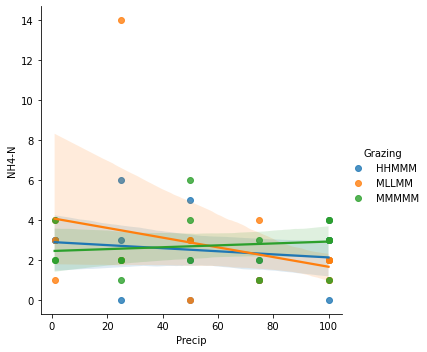

In [22]:
sns.lmplot(x= 'Precip', y= 'NH4-N', hue= 'Grazing', data= prs[prs['Year']== 2021]) #prs probes where out after grazing

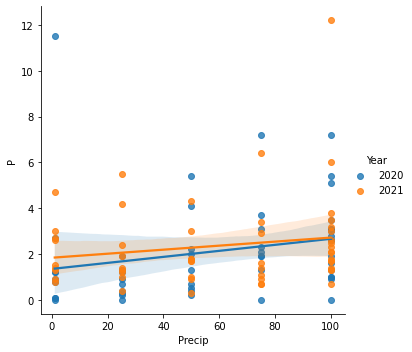

In [23]:
sns.lmplot(x= 'Precip', y= 'P', hue= 'Year', data= prs)

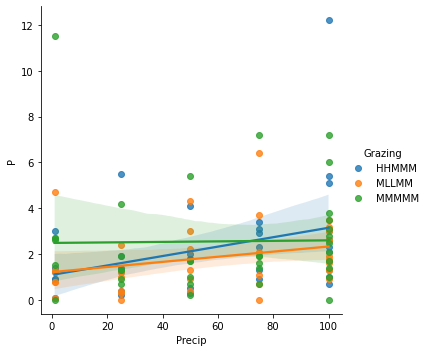

In [24]:
sns.lmplot(x= 'Precip', y= 'P', hue= 'Grazing', data= prs)

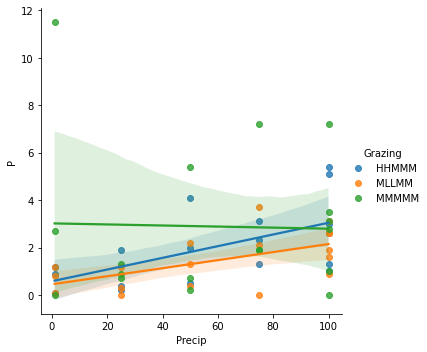

In [25]:
sns.lmplot(x= 'Precip', y= 'P', hue= 'Grazing', data= prs[prs['Year']== 2020]) # probes pulled before grazing

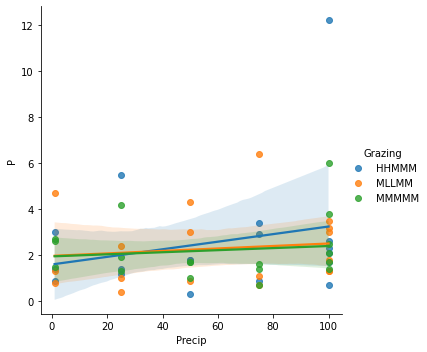

In [26]:
sns.lmplot(x= 'Precip', y= 'P', hue= 'Grazing', data= prs[prs['Year']== 2021]) # probes pulled after grazing

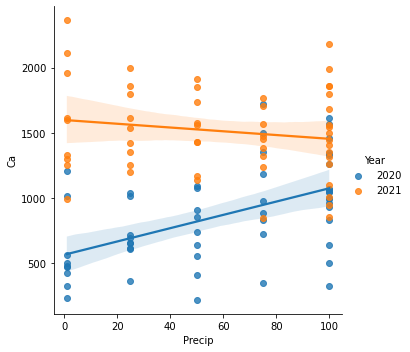

In [27]:
sns.lmplot(x= 'Precip', y= 'Ca', hue= 'Year', data= prs)

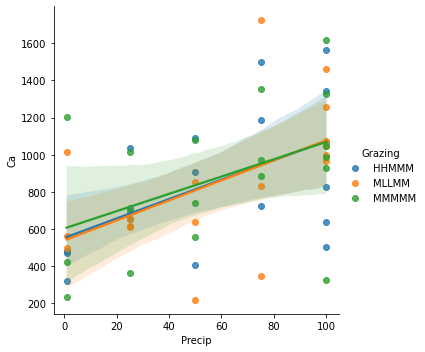

In [28]:
sns.lmplot(x= 'Precip', y= 'Ca', hue= 'Grazing', data= prs[prs['Year']== 2020]) # probes pulled before grazing

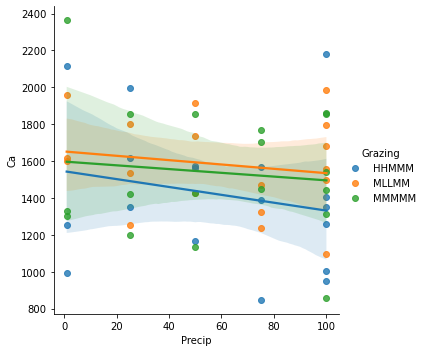

In [29]:
sns.lmplot(x= 'Precip', y= 'Ca', hue= 'Grazing', data= prs[prs['Year']== 2021]) # probes pulled before grazing

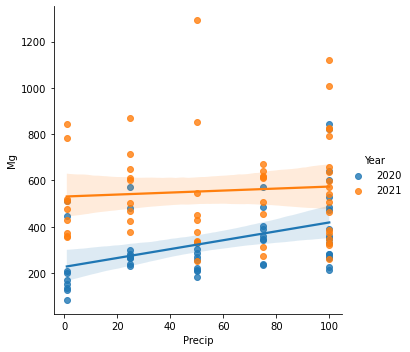

In [30]:
sns.lmplot(x= 'Precip', y= 'Mg', hue= 'Year', data= prs)

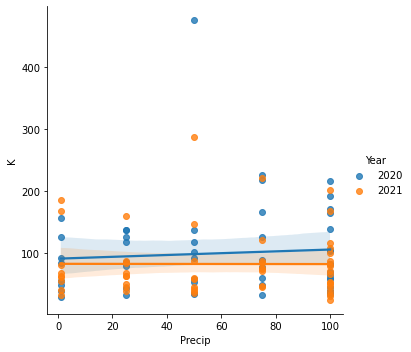

In [31]:
sns.lmplot(x= 'Precip', y= 'K', hue= 'Year', data= prs)

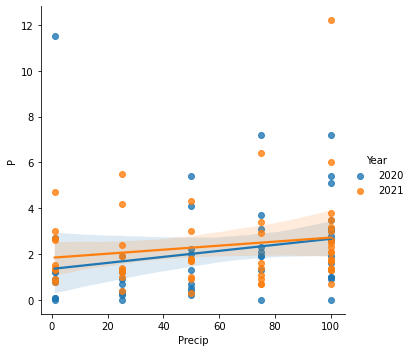

In [32]:
sns.lmplot(x= 'Precip', y= 'P', hue= 'Year', data= prs)

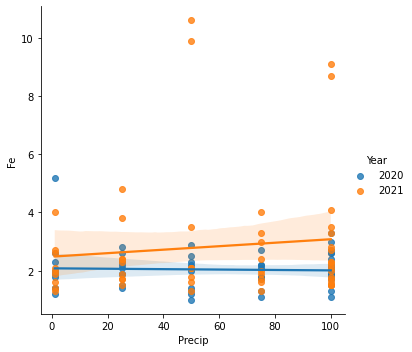

In [33]:
sns.lmplot(x= 'Precip', y= 'Fe', hue= 'Year', data= prs)

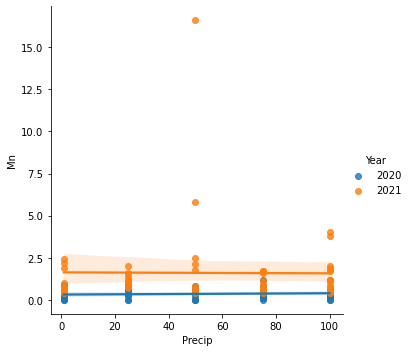

In [34]:
sns.lmplot(x= 'Precip', y= 'Mn', hue= 'Year', data= prs)

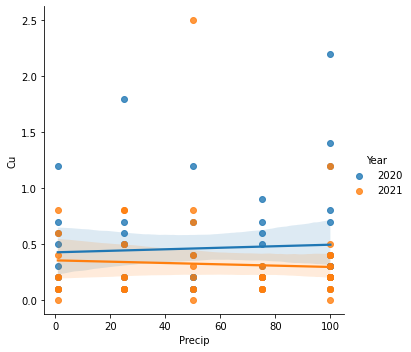

In [35]:
sns.lmplot(x= 'Precip', y= 'Cu', hue= 'Year', data= prs)

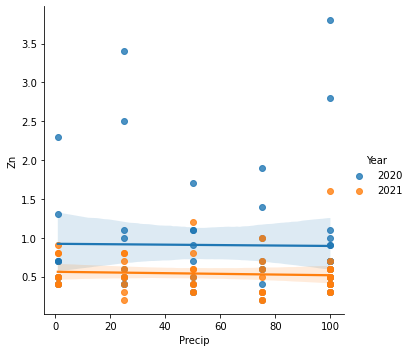

In [36]:
sns.lmplot(x= 'Precip', y= 'Zn', hue= 'Year', data= prs)

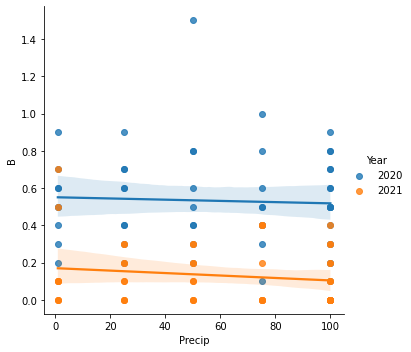

In [37]:
sns.lmplot(x= 'Precip', y= 'B', hue= 'Year', data= prs)

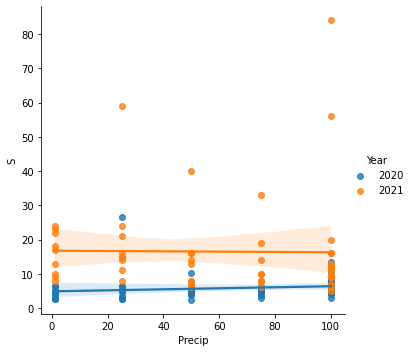

In [38]:
sns.lmplot(x= 'Precip', y= 'S', hue= 'Year', data= prs)

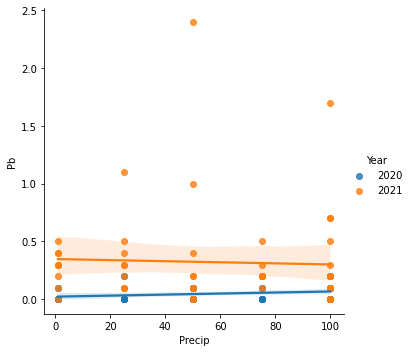

In [39]:
sns.lmplot(x= 'Precip', y= 'Pb', hue= 'Year', data= prs)

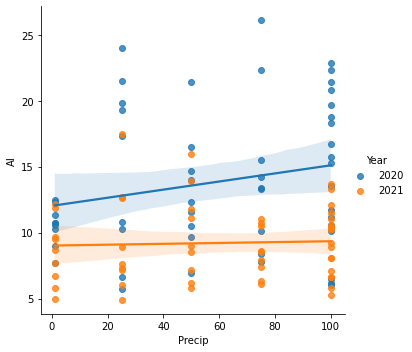

In [40]:
sns.lmplot(x= 'Precip', y= 'Al', hue= 'Year', data= prs)

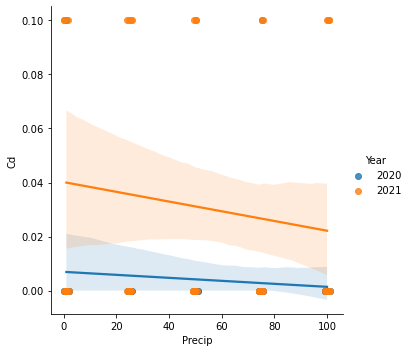

In [41]:
sns.lmplot(x= 'Precip', y= 'Cd', hue= 'Year', x_jitter= 1, data= prs)

In [21]:
p=prs1.groupby(['Precip']).agg('mean')[nutrients]


''' df_nex_bm_fg.groupby(['Site',
                                             'Disturbance',
                                             'Exclosure',
                                             'Date_cln']).mean().reset_index().sort_values('Date_cln')[['Site',
                    
                                                                                                        'Date_cln']],
#df = iris.groupby(['species']).agg({'sepal_length':['mean','min','max'],'sepal_width':'count'})'''

" df_nex_bm_fg.groupby(['Site',\n                                             'Disturbance',\n                                             'Exclosure',\n                                             'Date_cln']).mean().reset_index().sort_values('Date_cln')[['Site',\n                    \n                                                                                                        'Date_cln']],\n#df = iris.groupby(['species']).agg({'sepal_length':['mean','min','max'],'sepal_width':'count'})"

In [22]:
p.head()

,NO3-N,NH4-N,Ca,Mg,K,P,Fe,Mn,Cu,Zn,B,S,Pb,Al,Cd
Precip,,,,,,,,,,,,,,,
1,20.161111,3.600000,1096.444444,371.611111,79.500000,2.077778,2.188889,0.694444,0.355556,0.705556,0.350000,10.200000,0.150000,9.572222,0.022222
25,25.611111,4.527778,1132.500000,451.500000,82.833333,1.455556,2.288889,0.827778,0.422222,0.844444,0.333333,13.516667,0.194444,12.222222,0.022222
50,18.194444,3.588889,1127.611111,396.444444,105.444444,1.850000,2.877778,1.888889,0.461111,0.672222,0.372222,9.638889,0.266667,11.505556,0.016667
75,16.177778,4.200000,1237.722222,448.666667,103.333333,2.366667,2.116667,0.705556,0.288889,0.622222,0.333333,8.805556,0.127778,11.561111,0.016667
100,15.786111,3.705556,1267.277778,507.527778,85.833333,2.830556,2.575000,0.877778,0.411111,0.738889,0.300000,12.263889,0.183333,12.127778,0.011111


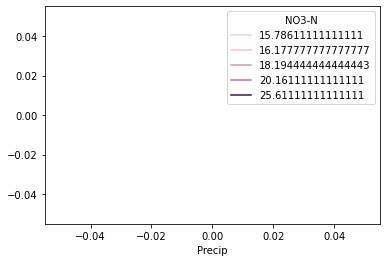

In [29]:
sns.lineplot(x='Precip',data=p, hue='NO3-N');

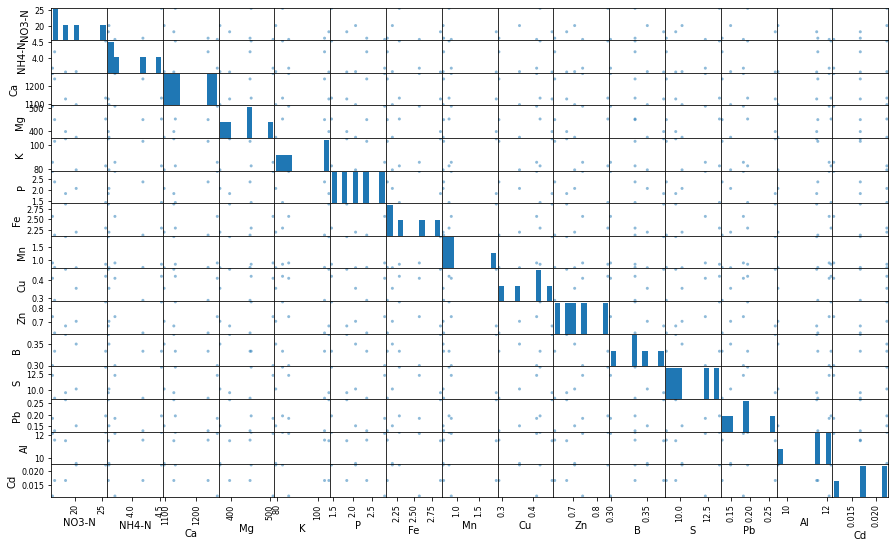

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(p,figsize=(15, 9),);

In [24]:
p.corr()

,NO3-N,NH4-N,Ca,Mg,K,P,Fe,Mn,Cu,Zn,B,S,Pb,Al,Cd
NO3-N,1.000000,0.567413,-0.669810,-0.242522,-0.504534,-0.866531,-0.226096,-0.122341,0.313494,0.797292,0.215211,0.611957,0.145544,0.025544,0.807886
NH4-N,0.567413,1.000000,0.101524,0.352240,-0.074452,-0.439644,-0.520896,-0.422363,-0.228748,0.461751,-0.250956,0.413572,-0.288908,0.521961,0.354113
Ca,-0.669810,0.101524,1.000000,0.856829,0.238400,0.800949,-0.029914,-0.267632,-0.320557,-0.251946,-0.774457,-0.003703,-0.330258,0.561515,-0.836702
Mg,-0.242522,0.352240,0.856829,1.000000,-0.065978,0.517570,0.029125,-0.287026,0.008762,0.274215,-0.887376,0.500338,-0.149157,0.795119,-0.674465
K,-0.504534,-0.074452,0.238400,-0.065978,1.000000,0.055240,0.382311,0.605546,-0.059155,-0.702696,0.416549,-0.683016,0.315031,0.271385,-0.367680
P,-0.866531,-0.439644,0.800949,0.517570,0.055240,1.000000,0.012813,-0.259756,-0.352863,-0.460622,-0.632063,-0.226182,-0.381979,0.026574,-0.812057
Fe,-0.226096,-0.520896,-0.029914,0.029125,0.382311,0.012813,1.000000,0.900244,0.832557,-0.023233,0.270840,0.035639,0.918531,0.316904,-0.481385
Mn,-0.122341,-0.422363,-0.267632,-0.287026,0.605546,-0.259756,0.900244,1.000000,0.707065,-0.196482,0.629576,-0.231357,0.923465,0.173557,-0.210273
Cu,0.313494,-0.228748,-0.320557,0.008762,-0.059155,-0.352863,0.832557,0.707065,1.000000,0.508430,0.216857,0.496895,0.919401,0.334932,-0.094230
Zn,0.797292,0.461751,-0.251946,0.274215,-0.702696,-0.460622,-0.023233,-0.196482,0.508430,1.000000,-0.300505,0.963633,0.188275,0.340510,0.338272
